In [1]:
suppressMessages(library("DESeq2"))

library("ggplot2")

library("RColorBrewer")

In [2]:
counts <- read.csv("counts_for_deseq2.csv",
                  header = TRUE, row.names = 1)

counts$Length <- NULL

head(counts)

,N2_CTR_1,N2_CTR_3,N2_CTR_4,N2_HS_1,N2_HS_3,N2_HS_4
WBGene00197333,0,0,0,0,0,0
WBGene00198386,0,0,0,0,0,0
WBGene00015153,2,5,7,174,26,61
WBGene00002061,4640,5807,5218,1386,1238,1954
WBGene00255704,5,1,4,48,19,37
WBGene00235314,6,0,14,0,0,0


In [3]:

col_data <- read.csv("conditions_for_deseq2.csv",
                  header = TRUE, row.names = 1)

head(col_data)

,condition
N2_CTR_1,CTR
N2_CTR_3,CTR
N2_CTR_4,CTR
N2_HS_1,HS
N2_HS_3,HS
N2_HS_4,HS


In [4]:
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = col_data,
                              design = ~ condition)

In [5]:
dds <- dds[ rowSums(counts(dds)) > 0, ]


In [6]:
dds <- DESeq(dds)


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [7]:
res <- results(dds)

write.csv(as.data.frame(res), file = "chronic_diff_expression")

In [9]:
summary(res)


out of 31180 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 5343, 17%
LFC < 0 (down)     : 3037, 9.7%
outliers [1]       : 44, 0.14%
low counts [2]     : 9659, 31%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [10]:
summary(res)


out of 31180 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 5343, 17%
LFC < 0 (down)     : 3037, 9.7%
outliers [1]       : 44, 0.14%
low counts [2]     : 9659, 31%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



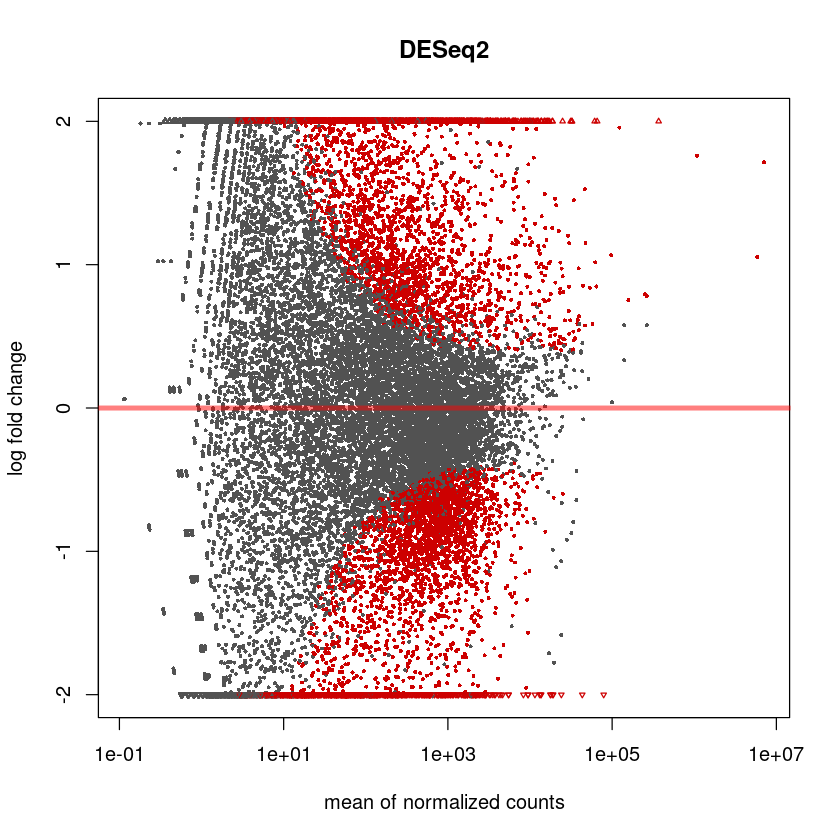

In [11]:
plotMA(res, main = "DESeq2", ylim = c(-2, 2))


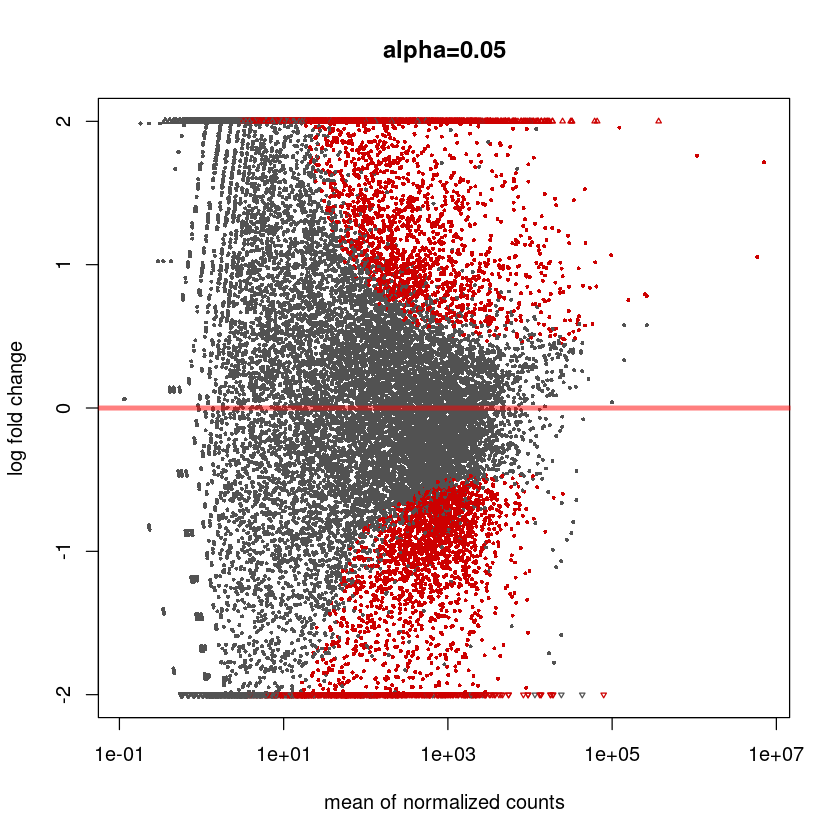

In [12]:
res05 <- results(dds, alpha = 0.05)

plotMA(res05, main = "alpha=0.05", ylim = c(-2,2))

$y
[1] "PC2: 5% variance"

attr(,"class")
[1] "labels"

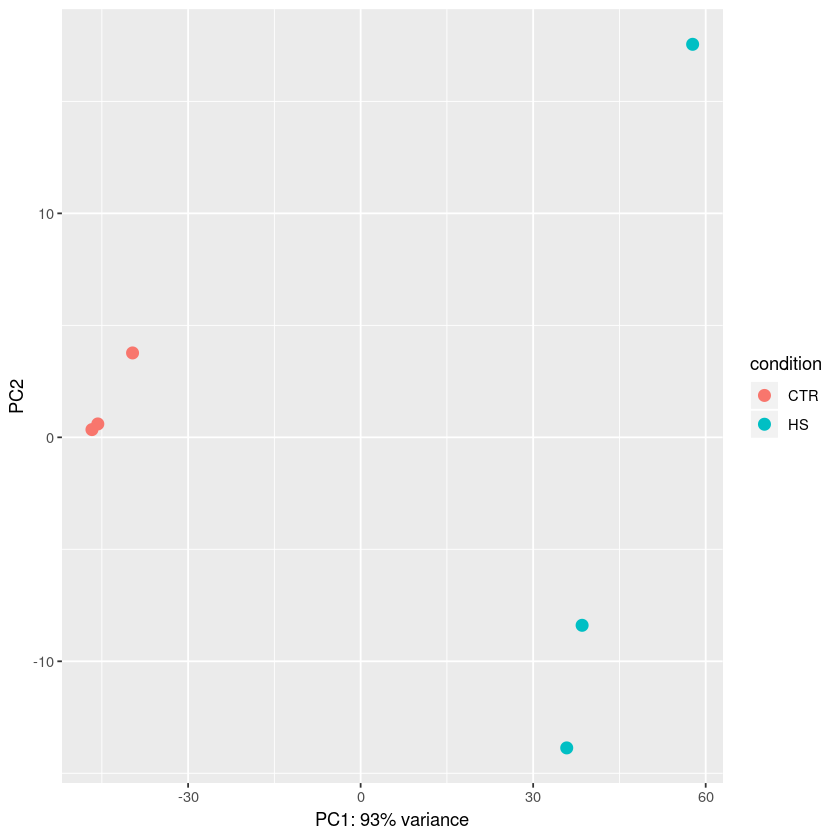

In [13]:

rld <- rlog(dds)
vsd <- varianceStabilizingTransformation(dds)

data <- plotPCA(rld, intgroup = "condition", returnData = TRUE)
percentVar <- round(100 * attr(data, "percentVar"))
ggplot(data, aes(PC1, PC2, color=condition)) +
    geom_point(size=3) +
    xlab(paste0("PC1: ",percentVar[1], "% variance")) 
    ylab(paste0("PC2: ",percentVar[2], "% variance"))

Warning message in plot.window(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.window(...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_cols" is not a graphical parameter”

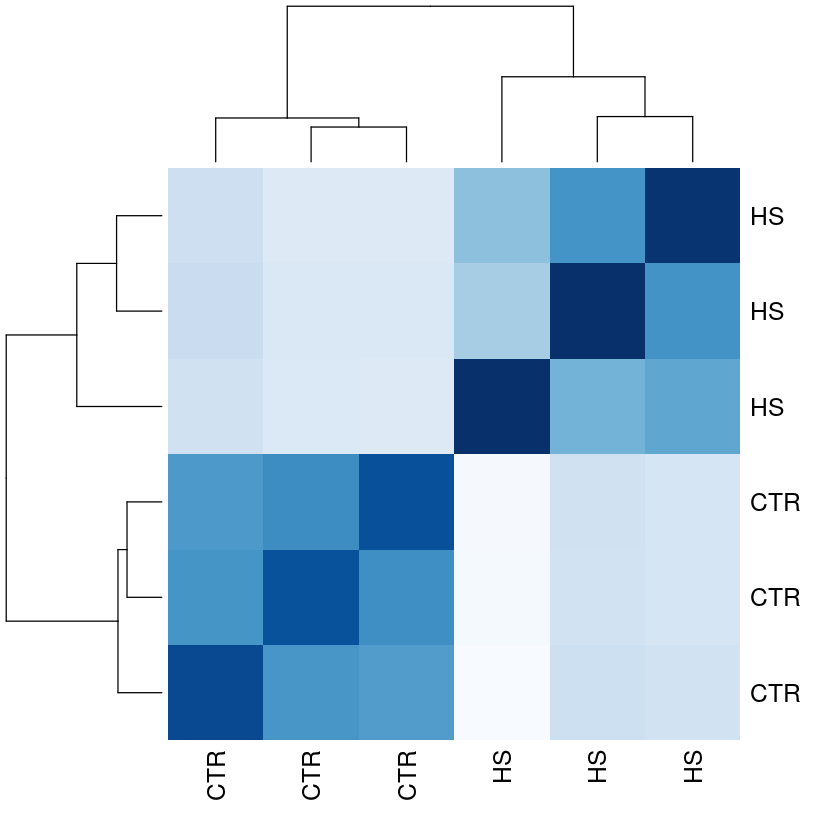

In [14]:

sampleDists <- dist(t(assay(rld)))


sampleDistMatrix <- as.matrix(sampleDists)

rownames(sampleDistMatrix) <- paste(rld$condition)

colnames(sampleDistMatrix) <- paste(rld$condition)

colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)

heatmap(sampleDistMatrix,
clustering_distance_rows = sampleDists,
clustering_distance_cols = sampleDists,
col = colors)

In [16]:
# Get the NORMALIZED READS from Deseq2 

dds <- estimateSizeFactors(dds)
all_norm_counts=counts(dds, normalized=TRUE)

# convert it to a dataframe then save it to a csv
all_norm_counts_df <- as.data.frame(all_norm_counts)
write.csv(as.data.frame(all_norm_counts_df), file = "normalized_DESEQ2_READS.csv")

head(all_norm_counts_df)


,N2_CTR_1,N2_CTR_3,N2_CTR_4,N2_HS_1,N2_HS_3,N2_HS_4
WBGene00015153,1.364508,3.4603159,4.897580,238.52594,48.54568,66.07550
WBGene00002061,3165.657961,4018.8108324,3650.796297,1899.98248,2311.52144,2116.58250
WBGene00255704,3.411269,0.6920632,2.798617,65.80026,35.47569,40.07858
WBGene00235314,4.093523,0.0000000,9.795161,0.00000,0.00000,0.00000
WBGene00001177,2499.778183,1803.5166229,1970.226595,2124.80004,2053.85588,1725.54551
WBGene00169236,2.046762,0.0000000,0.000000,0.00000,0.00000,0.00000
